# Analyse AirBNB Dataset
### Dataset AirBNB advertenties Amsterdam juni 2016

## Data importeren en bekijken

In [1]:
#Importen van pandas en numpy
import pandas as pd
import numpy as np

In [2]:
#Inlezen van de data
data = pd.read_csv("data/listings.csv")

In [3]:
#Data bekijken
print(data.head(2),"\n")
print((data.shape),"\n")
print(data.info(),"\n")
print(data.describe(include='all'),"\n")
print(data.columns,"\n")

         id                                         name   host_id host_name  \
0   9784567                       nice Room in Amsterdam  27280608     Petra   
1  13163805  Best cost benefit room near a metro station  35491461   Phillip   

   neighbourhood_group neighbourhood   latitude  longitude     room_type  \
0                  NaN  Bijlmer-Oost  52.323369   4.977730  Private room   
1                  NaN  Bijlmer-Oost  52.315635   4.978166  Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     95               1                  5  2016-06-27               0.81   
1     60               1                  4  2016-06-27               4.00   

   calculated_host_listings_count  availability_365  
0                               3               365  
1                               1                77   

(13849, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13849 entries, 0 to 13848
Data columns (total 16 columns):
id      

## Eerste observaties
• 13849 rijen en 16 kolommen  
• Kolom 'neighbourhood_group' heeft alleen NaN values  
• Kolom 'host_name' heeft 36 missende waardes  
• Kolommen 'last_review' and 'reviews_per_month' hebben ongeveer 2500 missende waardes  
• kolom 'last_review' vertegenwoordigt een datum  
• Geografische locatie is vermeld met lengte- en breedtegraad

## Dataset opschonen

In [4]:
#Verwijder kolom 'neighbourhood_group'
data = data.drop('neighbourhood_group', axis=1)

In [5]:
#Converteer 'last_review' (type object) naar type datetime
data['last_review'] = pd.to_datetime(data['last_review'])

In [6]:
#Controleer missende waardes van 'host_name'
print('Aantal missende waardes in \'host_name\':', data[data['host_name'].isnull()]['host_name'].size)
data[data['host_name'].isnull()].sample(4)

Aantal missende waardes in 'host_name': 36


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3866,12908664,Centrum Canal Apartment *Unique location*,70752441,NaN,Centrum-Oost,52.363863,4.905291,Entire home/apt,290,1,5,2016-06-27,3.95,1,359
265,2910674,Uniek gelegen familiehuis,14870124,NaN,Noord-West,52.418388,4.903857,Entire home/apt,175,2,7,2016-05-16,0.30,1,16
1324,7239806,Spacious Apartment Dam Square,15709424,NaN,Centrum-West,52.373707,4.893017,Entire home/apt,401,2,7,2016-05-22,0.93,1,0
1418,11139855,Room in the heart of Amsterdam,21771899,NaN,Centrum-West,52.370567,4.890297,Private room,99,3,1,2016-06-14,1.00,1,9


Bij deze 36 advertenties is 'host_name' niet ingevuld. Dit lijkt verder geen probleem.

In [7]:
#controleer de ~2500 missende waardes van 'last_review'
data[data['last_review'].isnull()].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9140,13431481,Lovely apartment near Vondelpark (with garden),70489687,Marjolein,Zuid,52.346766,4.861188,Entire home/apt,99,3,0,NaT,NaN,1,72
8889,12839823,"STUNNING cozy apt. Pijp area, best!",669178,Sammy,De Pijp - Rivierenbuurt,52.351277,4.889260,Entire home/apt,99,2,0,NaT,NaN,156,0
5473,13383765,Trendy one bedroom apartment,48703385,Tillan,Oud-Oost,52.357340,4.911786,Entire home/apt,140,2,0,NaT,NaN,71,29
524,13199169,Lovely family house in Amsterdam,47570656,Jeroen,Oud-Noord,52.397358,4.915843,Entire home/apt,110,4,0,NaT,NaN,1,26
4991,13467895,Industrieel design loft,38818865,Reineke,Centrum-Oost,52.372071,4.904332,Entire home/apt,276,2,0,NaT,NaN,1,146


Elke advertentie in deze <b>sample</b> heeft waarde 0 bij 'number_of_reviews' en waarde NaN bij 'reviews_per_month'.

In [8]:
#Controleer of alle advertenties zonder laatste review waarde 0 hebben bij 'aantal reviews' en geen waarde hebben bij 'reviews per maand'.
last_review_vs_number_of_reviews_check = (data[data['last_review'].isnull()].index == (data[data['number_of_reviews'] == 0].index)).all()
last_review_vs_reviews_per_month_check = (data[data['last_review'].isnull()].index == data[data['reviews_per_month'].isnull()].index).all()
print('last_review_NaT = number_of_reviews_0:', last_review_vs_number_of_reviews_check)
print('last_review_NaT = reviews_per_month_NaN:',last_review_vs_reviews_per_month_check)

last_review_NaT = number_of_reviews_0: True
last_review_NaT = reviews_per_month_NaN: True


In [9]:
#Tel het aantal advertenties zonder reviews
ads_zonder_review = data['last_review'].isnull().sum()
print('Aantal advertenties zonder reviews en geen waarbe bij \'laatste review\' en \'reviews per maand\':', ads_zonder_review)

Aantal advertenties zonder reviews en geen waarbe bij 'laatste review' en 'reviews per maand': 2463


In [10]:
#Converteer missende waardes in 'reviews_per_month' naar waarde 0
data.loc[data['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

In [11]:
#Controleer het opschonen van de dataset
data.sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13053,6989844,"Cozy room ""across"" the garden",7654744,Lucille,Bos en Lommer,52.377364,4.859117,Private room,75,2,3,2015-08-07,0.26,1,0
2017,12596838,Marnix Ace: 16P Supercentral (3&4),68338234,Lin,Centrum-West,52.365521,4.880396,Entire home/apt,600,2,0,NaT,0.00,7,170
8906,12774070,"Spacious apartment in the ""Pijp""",15728946,Thomas,De Pijp - Rivierenbuurt,52.351438,4.886771,Entire home/apt,200,2,3,2016-06-27,1.55,1,9
13441,9366973,Big bright room in Amsterdam West,19354668,Agata,Slotervaart,52.364870,4.846981,Private room,65,2,1,2015-11-16,0.13,1,246
11281,13519421,Cozy apartment in beautiful street near Vondel...,77651566,Jelmer,De Baarsjes - Oud-West,52.360830,4.861363,Entire home/apt,90,2,0,NaT,0.00,1,0


<b>Overzicht aanpassingen aan de dataset:</b>  
• Kolom 'neighbourhood_group' is verwijderd  
• Kolom 'last_review' is veranderd naar type datetime  
• Missende waardes in kolom 'reviews_per_month' zijn veranderd naar waarde 0

## Inhoud van de kolommen bekijken

In [12]:
#Bekijk de unieke waardes per kolom
for col in data.columns:
    print(col + ":", data[col].unique(), '\n')

id: [ 9784567 13163805  3719167 ... 13450662 13722497 13612056] 

name: ['nice Room in Amsterdam' 'Best cost benefit room near a metro station'
 'Nice  room in A´dam SE near nature & heart centre' ...
 'Fab home 15minutes from the city centre'
 'Spacious, split level appt 5 pers' 'Family House near Amsterdam'] 

host_id: [27280608 35491461 18991270 ... 32748297 19237729 78791769] 

host_name: ['Petra' 'Phillip' 'Maria' ... 'Sissi' 'Varol' 'Raphael'] 

neighbourhood: ['Bijlmer-Oost' 'Noord-Oost' 'Noord-West' 'Oud-Noord'
 'IJburg - Zeeburgereiland' 'Centrum-West'
 'Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Oud-Oost'
 'Watergraafsmeer' 'Gaasperdam - Driemond' 'Westerpark' 'Bijlmer-Centrum'
 'De Pijp - Rivierenbuurt' 'Zuid' 'Buitenveldert - Zuidas'
 'De Baarsjes - Oud-West' 'Bos en Lommer' 'Geuzenveld - Slotermeer'
 'Slotervaart' 'Osdorp' 'De Aker - Nieuw Sloten'] 

latitude: [52.32336932 52.31563541 52.31671072 ... 52.34209316 52.33515297
 52.34024521] 

longitude: [4.977729

 '2013-03-23T00:00:00.000000000' '2015-04-16T00:00:00.000000000'] 

reviews_per_month: [ 0.81  4.    0.48  1.62  0.65  0.    0.51  0.5   1.    0.57  0.07  0.68
  1.48  3.58  5.45  3.8   1.53  0.6   0.38  1.14  5.37  2.05  3.73  1.68
  3.42  1.24  3.44  1.12  2.08  3.54  2.1   5.33  2.69  1.02  0.46  0.26
  4.55  1.92  3.46  0.9   5.21  2.67  5.    3.85  0.16  5.65  0.75  1.84
  4.84  0.85  5.08  1.3   2.07  2.31  0.09  1.81  0.99  1.61  1.54  0.32
  0.78  0.53  7.08  4.29  1.38  0.74  1.73  0.11  4.46  0.52  0.45  0.4
  1.2   0.97  0.13  2.    2.11  1.47  0.7   0.42  2.34  0.36  1.15  2.66
  1.33  3.19  4.16  3.    0.17  1.28  2.33  3.05  0.8   0.41  3.29  1.8
  2.13  1.65  0.71  0.21  2.54  2.09  0.73  0.66  0.27  0.12  0.24  2.45
  0.61  2.38  0.35  0.34  2.44  1.97  1.05  1.43  2.32  0.03  2.15  1.58
  3.1   1.11  2.93  6.    0.59  0.25  1.94  1.67  0.98  0.92  3.99  2.29
  0.55  3.63  1.03  0.08  3.16  2.5   3.35  3.93  0.3   0.54  2.85  0.94
  1.6   0.58  0.89  2.6   3.06  0.05  1

In [13]:
#Aantal unieke waardes per kolom
for col in data.columns:
    print(col + ":", data[col].unique().size)

id: 13849
name: 13408
host_id: 11464
host_name: 4441
neighbourhood: 22
latitude: 13849
longitude: 13849
room_type: 3
price: 329
minimum_nights: 47
number_of_reviews: 234
last_review: 586
reviews_per_month: 694
calculated_host_listings_count: 27
availability_365: 366


In [14]:
#Bekijk de 5 meest voorkomende waardes per kolom
for col in data.columns:
    print(col + ':\n' + str(data[col].value_counts().head()), '\n')

id:
788479      1
1319013     1
13730485    1
1620658     1
1469096     1
Name: id, dtype: int64 

name:
Amsterdam                             9
Lovely apartment near Vondelpark      7
Spacious apartment near Vondelpark    7
Cosy apartment near Vondelpark        7
Spacious apartment                    7
Name: name, dtype: int64 

host_id:
669178      156
6999042     128
1464510      98
48703385     71
7002898      57
Name: host_id, dtype: int64 

host_name:
Sammy               156
Douwe&Niki          128
Michiel And Jane     98
Tillan               71
Anne                 70
Name: host_name, dtype: int64 

neighbourhood:
De Baarsjes - Oud-West     2431
Centrum-West               1880
De Pijp - Rivierenbuurt    1624
Centrum-Oost               1346
Westerpark                 1029
Name: neighbourhood, dtype: int64 

latitude:
52.354158    1
52.357495    1
52.378260    1
52.386150    1
52.358457    1
Name: latitude, dtype: int64 

longitude:
4.856153    1
4.945469    1
4.887780    1
4.9204

In [15]:
#Bekijk de hoogste en laagste waardes per kolom
for col in data.select_dtypes(include=['int64','float']).columns:
    print(col + ':\n' + str(data[col].nlargest(5)), '\n' + str(data[col].nsmallest(5)) ,'\n'  )

id:
12518    13828444
10374    13828053
10356    13827634
3839     13826545
10545    13825909
Name: id, dtype: int64 
3601      2818
6670      3209
11913     8061
4264     20168
7420     23651
Name: id, dtype: int64 

host_id:
12518    81524229
10356    81514049
1717     81421528
12778    81273080
5865     81264419
Name: host_id, dtype: int64 
3601     3159
12192    3718
6670     3806
4055     4716
6275     4904
Name: host_id, dtype: int64 

latitude:
13835    52.428571
272      52.424980
411      52.424641
375      52.424275
380      52.424255
Name: latitude, dtype: float64 
6219    52.290402
6218    52.290687
6206    52.291462
6203    52.291569
6180    52.292155
Name: latitude, dtype: float64 

longitude:
129     5.027689
204     5.026701
6176    5.020968
6186    5.013616
203     5.013557
Name: longitude, dtype: float64 
13713    4.763264
13837    4.770416
13828    4.775168
13841    4.777401
13745    4.780692
Name: longitude, dtype: float64 

price:
9395    8616
3266    1442
642     

### Een aantal gegevens op een rij: 
• Deze dataset bevat <b>13.849 AirBNB advertenties </b> in Amsterdam in juni 2016  
• <b>11.386 advertenties hebben één of meer een beoordelingen, 2463 advertenties hebben geen beoordeling</b>  
• Er zijn 11.464 unieke verhuurders  
• Een aantal van de verhuurder komt vaker dan één keer voor in de dataset, met als vaakst 156 keer  
• De advertenties zijn verdeeld in 22 buurten  
• Er worden drie soorten kamers aangeboden: 'Private room', 'Entire home/apt' en 'Shared room']  
• De prijs per overnachting varieerd van €10 tot €8.616  
• Het minimum aantal te boeken overnachtingen varieerd van 1 nacht tot 1000 nachten  
• <b>Het aantal beoordelingen per maand varieerd van 0 tot 12.25</b>  
• Het aantal beoordelingen per advertentie loopt op tot 416  


## Schating van het aantal boekingen per maand

AirBNB advertenties: 13.849  
Gemiddeld aantal beoordeling per advertentie per maand: 1.173025¹  
Review rate: 50%²  
Gemiddeld aantal boekingen per advertentie per maand: 1.173025 / 0.5 ≈ 2.35  
<b>Geschatte</b> aantal boekingen per maand in Amsterdam 13.849 * 2.35 ≈<b> 32.490</b>  

¹data['reviews_per_month'].mean() --> 1.173025  
²Inside Airbnb's "San Francisco Model" uses a modified methodology as follows:  
A Review Rate of 50% is used to convert reviews to estimated bookings.  
http://insideairbnb.com/about.html#disclaimers

## Schatting van de omzet per maand

In [16]:
omzet = sum(data['price'] * data['reviews_per_month'] / 0.50)
omzet_per_ad = omzet/data.shape[0]
omzet_per_ad_per_boeking = omzet_per_ad / data['reviews_per_month'].mean() /2
print('Geschatte omzet per maand totale AirBNB markt in Amsterdam: €' + str(round(omzet)).split('.')[0])
print('Geschatte omzet per advertentie per maand: €' + str(round(omzet_per_ad)).split('.')[0])
print('Geschatte omzet per advertentie per maand per boeking: €' + str(round(omzet_per_ad_per_boeking)).split('.')[0])

Geschatte omzet per maand totale AirBNB markt in Amsterdam: €3927929
Geschatte omzet per advertentie per maand: €284
Geschatte omzet per advertentie per maand per boeking: €121


## Aantal boekingen per buurt in Amsterdam

In [17]:
#groepeer de dataset per buurt
buurt_group = data.groupby(['neighbourhood'])
aantal_advertenties = buurt_group.size()
reviews_per_maand = buurt_group.mean()['reviews_per_month']
boekingen_per_maand = aantal_advertenties * reviews_per_maand / 0.5

In [18]:
#Tabel met aantal advertenties, reviews per maand en boekingen per maand per buurt
tabel = pd.concat([aantal_advertenties, reviews_per_maand, boekingen_per_maand], axis=1)
tabel.columns = ['aantal_advertenties', 'reviews_per_maand', 'boekingen_per_maand']
tabel = tabel.sort_values(by ='boekingen_per_maand', ascending=False)
tabel

,aantal_advertenties,reviews_per_maand,boekingen_per_maand
neighbourhood,,,
Centrum-West,1880,1.463606,5503.16
De Baarsjes - Oud-West,2431,1.089412,5296.72
De Pijp - Rivierenbuurt,1624,1.140751,3705.16
Centrum-Oost,1346,1.376040,3704.30
Westerpark,1029,1.146054,2358.58
Zuid,1010,0.941832,1902.50
Oud-Oost,806,1.004938,1619.96
Bos en Lommer,695,1.062201,1476.46
Oostelijk Havengebied - Indische Buurt,694,0.917680,1273.74


In [19]:
#Voeg omzet per buurt, omzet per advertentie en omzet per boekingen toe aan de tabel
omzet_per_buurt = []
for buurt in tabel.index:
    omzet_per_buurt.append(str(sum(data[data['neighbourhood'] == buurt]['price'] *  data[data['neighbourhood'] == buurt]['reviews_per_month'] /0.5)).split('.')[0])

tabel['omzet_per_buurt'] = omzet_per_buurt
tabel['omzet_per_buurt'] = tabel['omzet_per_buurt'].astype('int')
tabel['omzet_per_ad_per_maand'] = round(tabel['omzet_per_buurt'] / tabel['aantal_advertenties'],2)
tabel['omzet_per_boeking'] = round(tabel['omzet_per_ad_per_maand'] / tabel['reviews_per_maand'] / 2,2)
tabel

,aantal_advertenties,reviews_per_maand,boekingen_per_maand,omzet_per_buurt,omzet_per_ad_per_maand,omzet_per_boeking
neighbourhood,,,,,,
Centrum-West,1880,1.463606,5503.16,826398,439.57,150.17
De Baarsjes - Oud-West,2431,1.089412,5296.72,625999,257.51,118.19
De Pijp - Rivierenbuurt,1624,1.140751,3705.16,451374,277.94,121.82
Centrum-Oost,1346,1.376040,3704.30,543517,403.80,146.73
Westerpark,1029,1.146054,2358.58,275691,267.92,116.89
Zuid,1010,0.941832,1902.50,234461,232.14,123.24
Oud-Oost,806,1.004938,1619.96,180903,224.45,111.67
Bos en Lommer,695,1.062201,1476.46,136016,195.71,92.12
Oostelijk Havengebied - Indische Buurt,694,0.917680,1273.74,139773,201.40,109.73


## Plot de data van de buurten op een kaart van Amsterdam

In [20]:
#Importeer Geopandas en schakel plot weergave in de shell in
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#laad de shapefile van de 22 buurten in een dataframe en bekijk
sf = 'data/GEBIEDEN22_EXWATER.shp' #Bron: https://maps.amsterdam.nl/open_geodata/, 22 Gebieden excl.water
map_ams = gpd.read_file(sf)
map_ams

,Gebied_cod,Gebied,Stadsdeel_,Opp_m2,FID,geometry
0,DX20,Bijlmer Centrum,T,8431710,1,"POLYGON ((4.971847 52.284349, 4.971365 52.2840..."
1,DX21,Bijlmer Oost,T,4076020,2,"POLYGON ((4.996904 52.31763, 4.995265 52.31678..."
2,DX05,Oud West / De Baarsjes,E,3327090,3,"POLYGON ((4.882102 52.362043, 4.880608 52.3616..."
3,DX07,Osdorp,F,9068100,4,"POLYGON ((4.80954 52.363504, 4.809187 52.36349..."
4,DX13,Oud Oost,M,2118640,5,"POLYGON ((4.905406 52.359379, 4.90598 52.35948..."
5,DX11,Buitenveldert / Zuidas,K,7370270,6,"(POLYGON ((4.847048 52.337596, 4.847037 52.337..."
6,Dxxx,Westpoort,B,20343200,7,"POLYGON ((4.87897 52.395816, 4.876581 52.39459..."
7,DX19,Noord Oost,N,29483500,8,"(POLYGON ((4.952433 52.384174, 4.952433 52.386..."
8,DX22,Gaasperdam / Driemond,T,8701910,9,"POLYGON ((4.971847 52.284349, 4.97001 52.28635..."
9,DX12,De Pijp / Rivierenbuurt,K,3818920,10,"POLYGON ((4.903994 52.359033, 4.904336 52.3581..."


De namen van de buurten in de shapefile van Amsterdam zijn anders dan die in de dataset AirBNB én de shapefile bevat één extra buurt.

In [22]:
#Verander de namen van de buurten in map_ams naar de namen in de AirBNB dataset
map_ams['Gebied'] = map_ams['Gebied'].replace({'Bijlmer Centrum':'Bijlmer-Centrum', 
                                               'Bijlmer Oost':'Bijlmer-Oost',
                                               'Oud West / De Baarsjes':'De Baarsjes - Oud-West',
                                               'Osdorp':'Osdorp',
                                               'Oud Oost':'Oud-Oost',
                                               'Buitenveldert / Zuidas':'Buitenveldert - Zuidas',
                                               'Noord Oost':'Noord-Oost',
                                               'Gaasperdam / Driemond':'Gaasperdam - Driemond',
                                               'De Pijp / Rivierenbuurt':'De Pijp - Rivierenbuurt',
                                               'Geuzenveld-Slotermeer-Sloterdijken':'Geuzenveld - Slotermeer',
                                               'Centrum-West':'Centrum-West',
                                               'De Aker, Sloten en Nieuw Sloten':'De Aker - Nieuw Sloten',
                                               'Noord West':'Noord-West',
                                               'IJburg / Eiland Zeeburg':'IJburg - Zeeburgereiland',
                                               'Slotervaart':'Slotervaart',
                                               'Westerpark':'Westerpark',
                                               'Indische Buurt / Oostelijk Havengebied':'Oostelijk Havengebied - Indische Buurt',
                                               'Bos en Lommer':'Bos en Lommer',
                                               'Oud Zuid':'Zuid',
                                               'Watergraafsmeer':'Watergraafsmeer',
                                               'Centrum-Oost':'Centrum-Oost',
                                               'Oud Noord':'Oud-Noord'})
#'Westpoort' zit wel in de dataset map_ams, maar niet in de dataset airBNB.
# Verwijder rij 'Westpoort' uit de dataset map_ams
westpoort_index = map_ams[map_ams['Gebied']=='Westpoort'].index
map_ams = map_ams.drop(map_ams.index[westpoort_index])

In [23]:
#Merge gegevens van de tabel met de gegevens van de shapefile
map_ams = pd.merge(left=map_ams, right=tabel, how='inner', left_on='Gebied', right_on='neighbourhood' )
map_ams.head()

,Gebied_cod,Gebied,Stadsdeel_,Opp_m2,FID,geometry,aantal_advertenties,reviews_per_maand,boekingen_per_maand,omzet_per_buurt,omzet_per_ad_per_maand,omzet_per_boeking
0,DX20,Bijlmer-Centrum,T,8431710,1,"POLYGON ((4.971847 52.284349, 4.971365 52.2840...",61,1.617213,197.30,10148,166.36,51.43
1,DX21,Bijlmer-Oost,T,4076020,2,"POLYGON ((4.996904 52.31763, 4.995265 52.31678...",72,1.591806,229.22,14891,206.82,64.96
2,DX05,De Baarsjes - Oud-West,E,3327090,3,"POLYGON ((4.882102 52.362043, 4.880608 52.3616...",2431,1.089412,5296.72,625999,257.51,118.19
3,DX07,Osdorp,F,9068100,4,"POLYGON ((4.80954 52.363504, 4.809187 52.36349...",99,1.820303,360.42,28607,288.96,79.37
4,DX13,Oud-Oost,M,2118640,5,"POLYGON ((4.905406 52.359379, 4.90598 52.35948...",806,1.004938,1619.96,180903,224.45,111.67
5,DX11,Buitenveldert - Zuidas,K,7370270,6,"(POLYGON ((4.847048 52.337596, 4.847037 52.337...",160,1.087938,348.14,32497,203.11,93.35
6,DX19,Noord-Oost,N,29483500,8,"(POLYGON ((4.952433 52.384174, 4.952433 52.386...",159,0.967484,307.66,25694,161.60,83.52
7,DX22,Gaasperdam - Driemond,T,8701910,9,"POLYGON ((4.971847 52.284349, 4.97001 52.28635...",63,1.558730,196.40,13453,213.54,68.50
8,DX12,De Pijp - Rivierenbuurt,K,3818920,10,"POLYGON ((4.903994 52.359033, 4.904336 52.3581...",1624,1.140751,3705.16,451374,277.94,121.82
9,DX06,Geuzenveld - Slotermeer,F,14937200,11,"POLYGON ((4.835343 52.373139, 4.835256 52.3729...",138,1.444928,398.80,31765,230.18,79.65


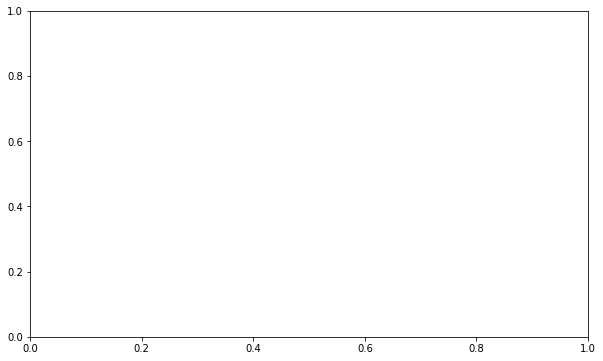

In [24]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))


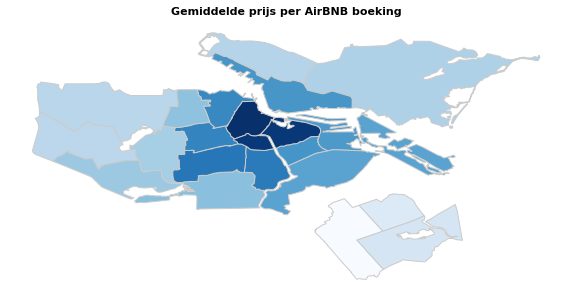

In [25]:

ax = map_ams.plot('omzet_per_boeking',cmap='Blues',figsize=(10,7),edgecolor='0.8')
ax.axis('off')
ax.set_title('Gemiddelde prijs per AirBNB boeking', fontdict={'fontsize': '11', 'fontweight' : '800'})
# ax.annotate('Michiel Sijpkens', xy=(0.1, 0.08))

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=120, vmax=200))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

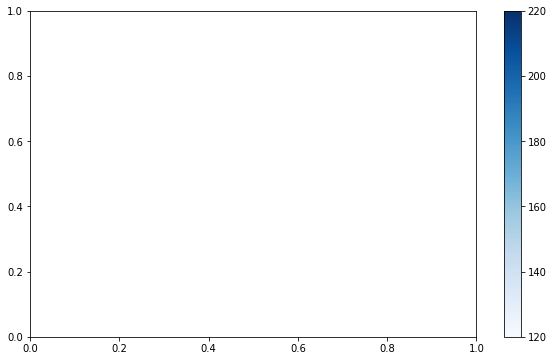

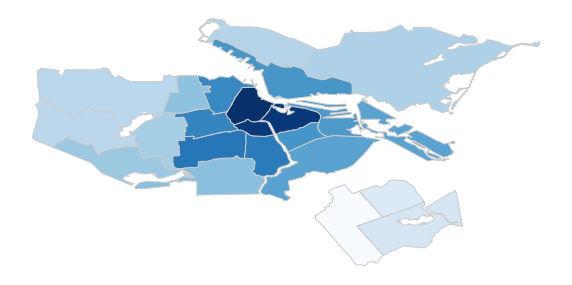

In [26]:
# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
ax = map_ams.plot('omzet_per_boeking',cmap='Blues',figsize=(10,7),edgecolor='0.8')

ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [27]:
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=120, vmax=200))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

(4.73916805, 5.08414895, 52.270537899999994, 52.43829009999999)

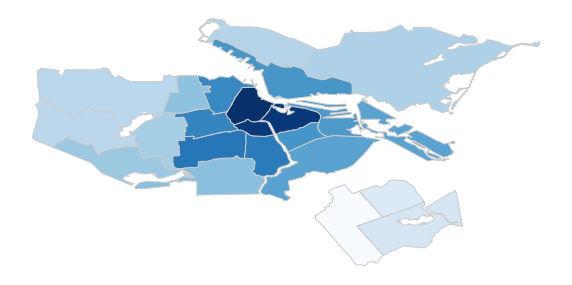

In [42]:
ax = map_ams.plot('omzet_per_boeking',cmap='Blues',figsize=(10,7),edgecolor='0.8')
ax.axis('off')